# **Modelagem Matemática e Computacional - Aula prática 2**
### Nome: Riquelme Freitas Gomes
### Data: 20/08/2023
<br>

# **Objetivos:**
### 1. Fazer um código para executar a redução de dimensionalidade para a matrix RGB. Pegar cada matriz R, G e B, reduzir a dimensão e depois juntar e armar a RBG com dimensão reduzida.

### 2. Pegar diversas imagens e fazer a redução de dimensão usando SVD, aprensentando gráficos.

# **SVD (Decomposição em Valores Singulares)**

### A SVD é uma técnica da álgebra linear que consiste em decompor uma matriz $A$ em três matrizes: uma matriz de colunas esquerdas ortogonais $U$, uma matriz diagonal $S$ e uma matriz de colunas direitas ortogonais $V^T$, de forma que $A = U · S · V^T$.
<br>

### As matrizes $U$ e $V^T$ são chamadas de matrizes de bases ortogonais e a matriz $S$ contém os valores singulares da matriz $A$. A SVD é amplamente utilizada em diversas áreas, como processamento de sinais, reconhecimento de padrões, estatística e aprendizado de máquina.
<br>

### A decomposição SVD pode ser calculada a partir da matriz $A$ por meio das seguintes fórmulas:
### $A^T · A = V · S^2 · V^T$
### $A · A^T = U · S^2 · U^T$
### onde $V$ e $U$ são as matrizes de bases ortogonais e $S$ é a matriz diagonal contendo os valores singulares de $A$. Os valores singulares são a raiz quadrada dos autovalores da matriz $A^T · A$ ou $A · A^T$, que são iguais entre si. Para calcular a SVD completa, é necessário ordenar os valores singulares em ordem decrescente e reorganizar as colunas de $U$ e $V$ de acordo com essa ordenação.
<br>

### Observações:
* ### SVD fornece uma maneira sistemática de determinar uma aproximação de baixa dimensão a dados de alta dimensão em termos de padrões dominantes.
* ### Esta técnica é baseada em dados em que os padrões são descobertos puramente a partir de dados, sem a adição de conhecimento especializado ou intuição.
* ### O SVD é numericamente estável e fornece uma representação hierárquica dos dados em termos de um novo sistema de coordenadas definido por correlações dominantes dentro dos dados.
* ### SVD existe para qualquer matriz, ao contrário da autodecomposição.

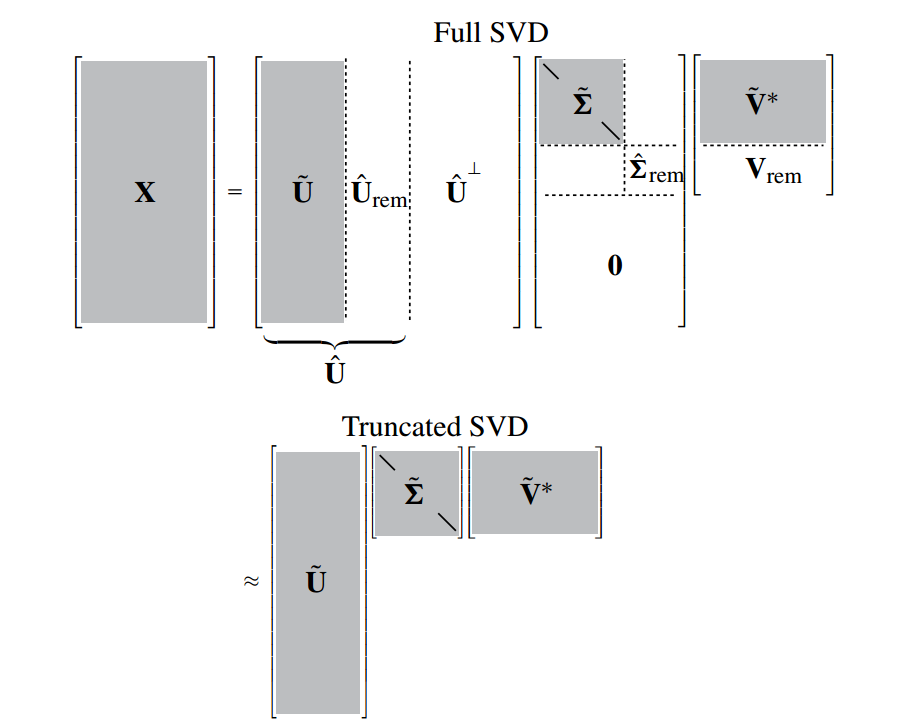

In [204]:
import cv2
from google.colab.patches import cv2_imshow

# Carrega a imagem
imagem1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Auxiliar/image1.png')

# Exibe a imagem
cv2_imshow(imagem1)

## **SVD e redução de dimensionalidade**

### A Decomposição em Valores Singulares (Singular Value Decomposition) é uma técnica matemática poderosa e uma de suas aplicações mais relevantes é a redução de dimensionalidade, que envolve a representação de dados complexos em um espaço de menor dimensão, mantendo as características essenciais dos dados originais. Essa redução de dimensionalidade é especialmente útil em problemas nos quais lidamos com alta dimensionalidade dos dados, como em análise de imagens, processamento de linguagem natural e recomendação de sistemas.
<br>

### A redução de dimensionalidade ocorre ao selecionar um subconjunto dos valores singulares e suas correspondentes colunas em $U$ e $V$. Ao descartar os valores singulares menos significativos, podemos reduzir o número de dimensões sem perder muita informação importante. Isso é feito retendo os primeiros $k$ valores singulares, onde $k$ é um valor menor do que o número original de dimensões. O resultado é uma projeção dos dados originais em um espaço k-dimensional, conhecido como "espaço latente".
<br>

### A redução de dimensionalidade usando SVD oferece várias vantagens:
1. ### **Economia de Espaço**: Representar dados em um espaço de menor dimensão requer menos espaço de armazenamento, o que é crucial quando lidamos com grandes conjuntos de dados.

2. ### **Redução de Ruído**: Os valores singulares menos significativos podem ser considerados como ruído nos dados. Descartar esses valores ajuda a eliminar informações irrelevantes ou irrelevantes.

3. ### **Generalização**: A redução de dimensionalidade pode ajudar a evitar o overfitting, um problema comum em modelos complexos que podem se ajustar demais aos dados de treinamento.

4. ### **Eficiência Computacional**: Ao lidar com dados de menor dimensão, operações computacionais, como cálculos de produtos internos e multiplicação de matrizes, se tornam mais rápidas.
<br>

### No entanto, é importante observar que a redução excessiva de dimensionalidade pode levar à perda significativa de informações, levando a representações imprecisas dos dados originais. Portanto, a escolha adequada do valor de $k$ é crucial e muitas vezes envolve experimentação e análise cuidadosa.




## **SVD para compressão de imagens**

### A Compressão de Imagens é uma aplicação prática da Decomposição em Valores Singulares, uma técnica que permite reduzir o espaço de armazenamento e a largura de banda necessários para representar imagens, mantendo uma qualidade visual aceitável. A SVD é usada para separar as informações mais significativas das menos relevantes, o que resulta em uma representação mais compacta da imagem.
<br>

### O processo de compressão de imagens usando SVD pode ser dividido em algumas etapas principais:

1. ### **Decomposição SVD da Imagem**
### Primeiramente, a imagem é convertida em uma matriz numérica, onde cada elemento representa um pixel. Essa matriz é então decomposta usando SVD em três componentes: $U$, $S$ e $V^T$. A matriz $U$ contém informações sobre os vetores de imagem (padrões), &S& é uma matriz diagonal contendo os valores singulares, e $V^T$ contém informações sobre como combinar esses padrões para reconstruir a imagem original.

2. ### **Seleção e Truncamento de Valores Singulares**
### Nessa etapa, os valores singulares são ordenados de forma decrescente. Para comprimir a imagem, os valores singulares menos significativos são truncados, ou seja, removidos da matriz $S$, juntamente com as colunas correspondentes em $U$ e as linhas correspondentes em $V^T$. Isso resulta em uma redução na dimensionalidade da representação da imagem. A quantidade de truncamento depende da qualidade desejada da imagem final e do nível de compressão desejado.

3. ### **Reconstrução da Imagem Comprimida**
### Após o truncamento, a imagem comprimida é reconstruída multiplicando as matrizes $U$, $S$ truncada e $V^T$. A imagem resultante não será idêntica à original, mas será uma aproximação que retém as características visuais mais relevantes. Quanto menor o número de valores singulares retidos, maior será a compressão e maior a perda de qualidade.
<br>

### A compressão de imagens usando SVD é muito eficaz para reduzir o tamanho dos dados, especialmente em áreas como armazenamento e transmissão de imagens. No entanto, é importante encontrar um equilíbrio entre a compressão e a qualidade visual. Uma compressão muito agressiva pode levar a excessiva perda de detalhes.

## **Tarefa 1:**

### No código abaixo, construi a função "reducao_dim" que recebe como entradas uma imagem e um valor de $k$ que representa o número de valores singulares a serem mantidos com a SVD. Tal função serve para executar a redução de dimensionalidade com o uso da SVD, transformando a imagem em matrizes RGB, reduzindo a dimensão dessas e depois juntando em uma única imagem reduzida. A função calcula a norma Euclidiana entre a matriz da imagem inicial e a matriz da imagem reconstruida para fins de comparação e entendimento do tamanho da diferença entre as imagens. Ao fim, são retornadas a imagem resultante para o $k$ de entrada e a norma calculada.

In [205]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define o número de valores singulares a serem mantidos
def reducao_dim(imagem, k):
  imagens_rgb = []

  # Divide a imagem “RGB” em três novas imagens, cada uma contendo uma cópia de uma das bandas originais (vermelho, verde, azul).
  img_r, img_g, img_b = Image.Image.split(imagem)

  for img in (img_r, img_g, img_b):

    # Converte a imagem em matrizes numpy
    matriz = np.array(img)

    # Calcula a decomposição SVD para a matriz
    U, S, V = np.linalg.svd(matriz, full_matrices=False)

    # Reconstrói a matriz original de forma reduzida
    matriz_r = U[:, :k] @ np.diag(S)[:k, :k] @ V[:k, :]

    # Converte as matrizes reduzidas em imagens RGB novamente
    imagens_rgb.append(Image.fromarray(matriz_r).convert('L'))


  # Junta as imagens em uma só imagem RGB de dimensão reduzida
  imagem_red = Image.merge('RGB', (imagens_rgb[0], imagens_rgb[1], imagens_rgb[2]))

  X = np.array(imagem)
  X_red = np.array(imagem_red)

  # Calcula e imprime a norma Euclidiana
  norma = np.linalg.norm(X - X_red)
  print(f"Norma Euclidiana: {norma}")

  return imagem_red, norma

## **Tarefa 2:**

### Abaixo, a fim de testar e analisar o código por mim implementado, utilizei a função anterior para fazer a redução de dimensão de algumas fotos de meus cachorros para alguns valores de $k$ e, a partir disso, observar as mudanças.

IMAGEM 1 (Original)


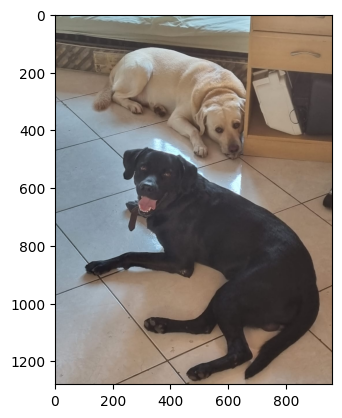


IMAGEM 2 (Original)


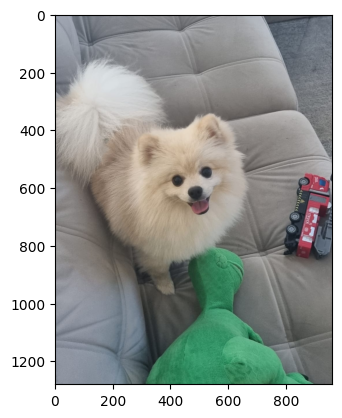

In [206]:
# Carregando imagens
img1 = Image.open('/content/drive/MyDrive/Colab Notebooks/Auxiliar/img1.jpg')
img2 = Image.open('/content/drive/MyDrive/Colab Notebooks/Auxiliar/img3.jpg')

lista_imagens = (img1, img2)  # Se necessário, é possível adicionar mais imagens à lista
for img in range(len(lista_imagens)):
  print(f"IMAGEM {img+1} (Original)")
  plt.imshow(lista_imagens[img])
  plt.show()
  print()

Valor de k: 10
Norma Euclidiana: 311011.3682970447


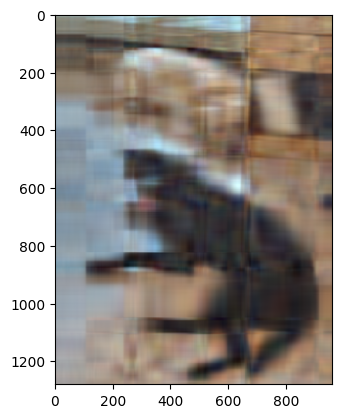


Valor de k: 50
Norma Euclidiana: 305676.8066864086


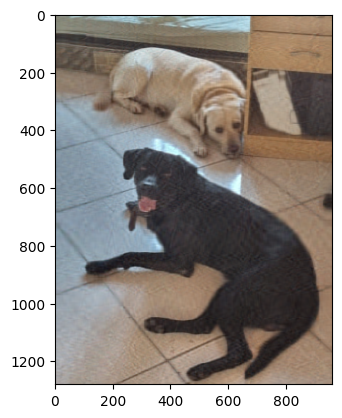


Valor de k: 200
Norma Euclidiana: 258502.93730439505


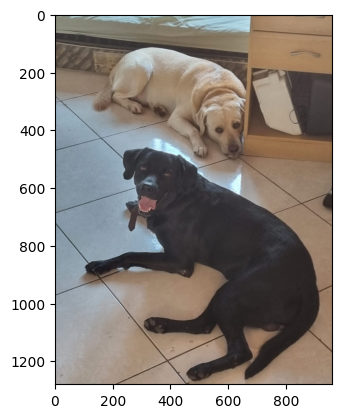


Valor de k: 960
Norma Euclidiana: 0.0


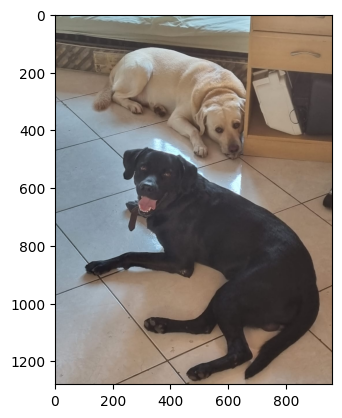

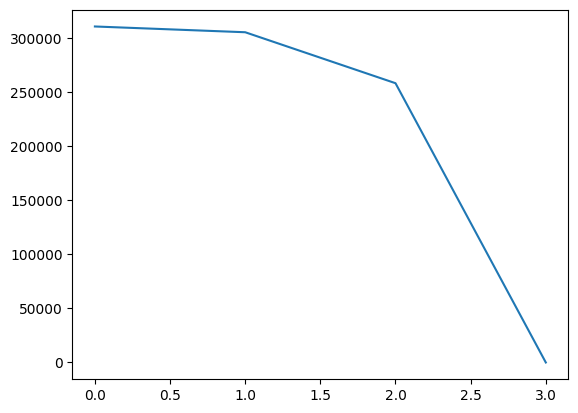

In [207]:
# Testes para a IMAGEM 1
normas1 = []

for k in (10, 50, 200, 960):
  print(f"Valor de k: {k}")
  img1_red, norma = reducao_dim(img1, k)
  plt.show(plt.imshow(img1_red))
  print()
  normas1.append(norma)

plt.plot(normas1)

 Nesse caso podemos observar, pelas fotos e pelo gráfico ao fim que, quanto maior foi o valor de $k$ escolhido, menor foi a redução feita, mais próxima ficou a imagem resultante da imagem original e, consequentemente, menor foi o valor da norma euclidiana entre elas. Além disso, é perceptível que a norma euclidiana atinge o valor zero quando $k = 960$ uma vez que este é o posto da imagem, nessa situação a imagem reconstruída fica idêntica à original.

Valor de k: 0
Norma Euclidiana: 263145.90997201536

Valor de k: 96
Norma Euclidiana: 289824.93876649055

Valor de k: 192
Norma Euclidiana: 256641.73830848324

Valor de k: 288
Norma Euclidiana: 206329.40711638756

Valor de k: 384
Norma Euclidiana: 131204.05581764612

Valor de k: 480
Norma Euclidiana: 43757.305767151614

Valor de k: 576
Norma Euclidiana: 3724.6766302593305

Valor de k: 672
Norma Euclidiana: 1358.027613857686

Valor de k: 768
Norma Euclidiana: 1357.4070870597368

Valor de k: 864
Norma Euclidiana: 1357.2866314820903

Valor de k: 960
Norma Euclidiana: 0.0



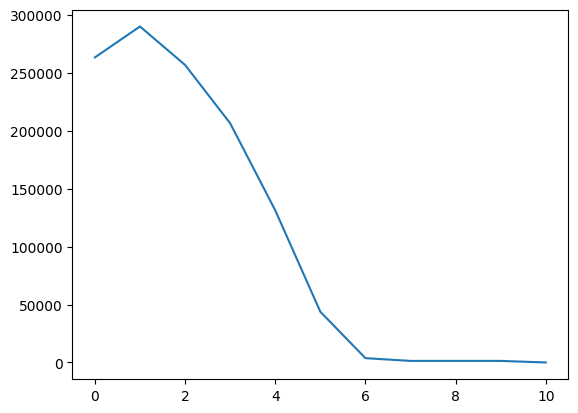

In [208]:
# Testes para a IMAGEM 2
normas2 = []

for k in range(0, 961, 96): # 10 valores entre 0 e 960
  print(f"Valor de k: {k}")
  img2_red, norma = reducao_dim(img2, k)
  print()
  normas2.append(norma)

plt.plot(normas2)

Nesse trecho de testes com a IMAGEM 2, me atentei somente aos resultados das normas e coloquei os valores possíveis para $k$ como sendo 10 números no intervalo de 0 a 960. Assim, agora com mais valores utilizados, é possível ver no gráfico que, ao aumentar o valor de $k$, a norma euclidiana chegou a crescer e atingir seu máximo em certo momento, porém em seguida voltou a diminuir, até atingir zero.

## **Formas para determinar o valor de $k$**

### A escolha adequada do valor $k$ na redução de dimensionalidade usando SVD é crucial para equilibrar a redução de dimensões com a retenção da informação importante dos dados originais. Existem algumas abordagens comuns para determinar o valor ideal de $k$:

1. ### **Método da Variância Acumulada:** Um método comum é escolher $k$ de forma que ele capture uma porcentagem significativa da variância total dos dados originais. Por exemplo, você pode decidir reter 95% ou 99% da variância. Isso é calculado somando os quadrados dos valores singulares e escolhendo $k$ de forma que a soma cumulativa alcance a porcentagem desejada. Isso garante que você retenha a maior parte da informação relevante dos dados.

2. ### **Gráfico de Variância Acumulada:** Plotar a variância acumulada em relação a $k$ pode ajudar a visualizar como a quantidade de variância retida varia com diferentes valores de $k$. Isso pode ajudar a identificar o ponto em que a curva se estabiliza, indicando que adicionar dimensões adicionais não contribuirá significativamente para a explicação da variância.

3. ### **Método de Corte de Cotovelo:** Semelhante a outras análises de agrupamento, esse método envolve plotar os valores singulares em relação a $k$ e procurar o ponto onde a curva começa a "dissolver" um padrão nítido, parecendo um "cotovelo". Esse ponto é considerado um bom ponto de equilíbrio entre reter informações e reduzir a dimensionalidade.

3. ### **Validação de Modelos:** Se a redução de dimensionalidade é parte de um pipeline de modelagem, você pode escolher diferentes valores de $k$ e avaliar o desempenho do seu modelo em um conjunto de validação. Isso permite determinar empiricamente qual valor de $k$ produz o melhor equilíbrio entre eficiência computacional e desempenho do modelo.

3. ### **Cross-Validation:** Em casos onde o desempenho do modelo é sensível à dimensionalidade, você pode realizar validação cruzada com diferentes valores de $k$ para escolher aquele que minimiza o erro de validação.
<br>

### A escolha de $k$ é um processo que pode envolver experimentação e análise cuidadosa, e não há um método único e definitivo que funcione para todos os conjuntos de dados e casos de uso. A escolha de $k$ também depende dos objetivos do seu projeto, das características dos seus dados e das restrições computacionais. Portanto, é uma boa prática explorar diferentes abordagens e considerar as implicações práticas ao selecionar o valor de $k$ para a redução de dimensionalidade.

## **Conclusão**

### Em resumo, a capacidade da SVD de decompor uma matriz em seus componentes singulares, enquanto destila as informações mais relevantes, tem implicações significativas em várias aplicações, incluindo a redução de dimensionalidade.

### A redução de dimensionalidade é uma abordagem fundamental na gestão de dados complexos. Por meio da seleção cuidadosa de um valor $k$, que representa o número de componentes singulares retidos após a decomposição, podemos simplificar os dados sem perder características cruciais. No entanto, É importante notar que a seleção do valor $k$ não é uma tarefa trivial, uma vez que essa escolha deve sempre considerar a finalidade da análise, a natureza dos dados e a quantidade aceitável de perda de informação. Reduzir a dimensionalidade muito agressivamente pode levar à perda de informações vitais e à distorção dos resultados. Portanto, encontrar o equilíbrio adequado entre compressão e retenção de informação é um desafio que exige conhecimento, experiência e testes cuidadosos. Dessa forma, a SVD, a redução de dimensionalidade e a escolha do valor $k$ estão interligados na busca por uma representação mais concisa e significativa dos dados.


## **Fontes e referências**

1. [SVD Visualized, Singular Value Decomposition explained.](https://www.youtube.com/watch?v=vSczTbgc8Rc)
2. [Decomposição em valores singulares](https://pt.wikipedia.org/wiki/Decomposição_em_valores_singulares)
3. [Redução da dimensão de um conjunto de
variáveis: decomposição em valores singulares
versus algoritmo colônia de formigas
](https://www.fc.unesp.br/Home/Departamentos/Matematica/revistacqd2228/v10a17-reducao-da-dimensao-de-um-conjunto-de-variaveis.pdf)
4. [SVD - Inteligência na Web e Big Data](https://folivetti.github.io/courses/BigData/PDF/Aula16.pdf)
5. [Transmissão de Imagens Utilizando SVD](https://www.matematicasorocaba.ufscar.br/arquivos/tcc-maria-cristina-tiemi.pdf)
6. [Material da Aula Prática 2 da disciplina de Modelagem Matemática e Computacional](https://classroom.google.com/u/1/c/NjE3OTg3NjgwNjA4/a/NjE4NzY1NDQ3NTAx/details)
